In [1]:
import sys
import os

# 添加 factor_evaluation.pyd 所在的目录到系统路径
pyd_path = r"D:\MG\！internship\！4L CAPITAL\因子评估器"
sys.path.append(pyd_path)

# 导入模块
from factor_evaluation import FactorEvaluation
from factor_evaluation import DataService
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

In [4]:
def triple_ma_kdj_divergence_factor(df, short_ma=5, mid_ma=20, long_ma=50, kdj_period=9):
    """Detects divergences between price action and KDJ in multi-MA trend context"""
    # MA Trend Filter
    ma_short = df['close'].ewm(span=short_ma, adjust=False).mean()
    ma_mid = df['close'].ewm(span=mid_ma, adjust=False).mean()
    ma_long = df['close'].ewm(span=long_ma, adjust=False).mean()
    trend_strength = (ma_short/ma_mid - 1) + (ma_mid/ma_long - 1)
    
    # KDJ Calculation
    low_min = df['low'].rolling(kdj_period, min_periods=1).min()
    high_max = df['high'].rolling(kdj_period, min_periods=1).max()
    rsv = 100 * (df['close'] - low_min) / (high_max - low_min + 1e-8)
    K = rsv.ewm(span=3, adjust=False).mean()
    
    # Divergence detection
    price_high = df['high'].rolling(20).max()
    k_high = K.rolling(20).max()
    bear_div = (df['close'] >= price_high) & (K < k_high)
    
    price_low = df['low'].rolling(20).min()
    k_low = K.rolling(20).min()
    bull_div = (df['close'] <= price_low) & (K > k_low)
    
    divergence = bull_div.astype(int) - bear_div.astype(int)
    return divergence * trend_strength

In [5]:
evaluator.set_factor(
    factor_data_or_func=triple_ma_kdj_divergence_factor,
    factor_name='triple_ma_kdj_divergence_factor'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
📈 平稳性检验 (ADF):
   p_value: 0.000000
   是否平稳: 是
🔗 相关性分析:
   IC (Pearson): -0.000144
   Rank_IC (Spearman): 0.001390
📊 信息比率:
   IR: 0.987132
   有效分组数: 2
📊 因子分布:
📋 数据概况:
   数据长度: 130379
   因子列: triple_ma_kdj_divergence_factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


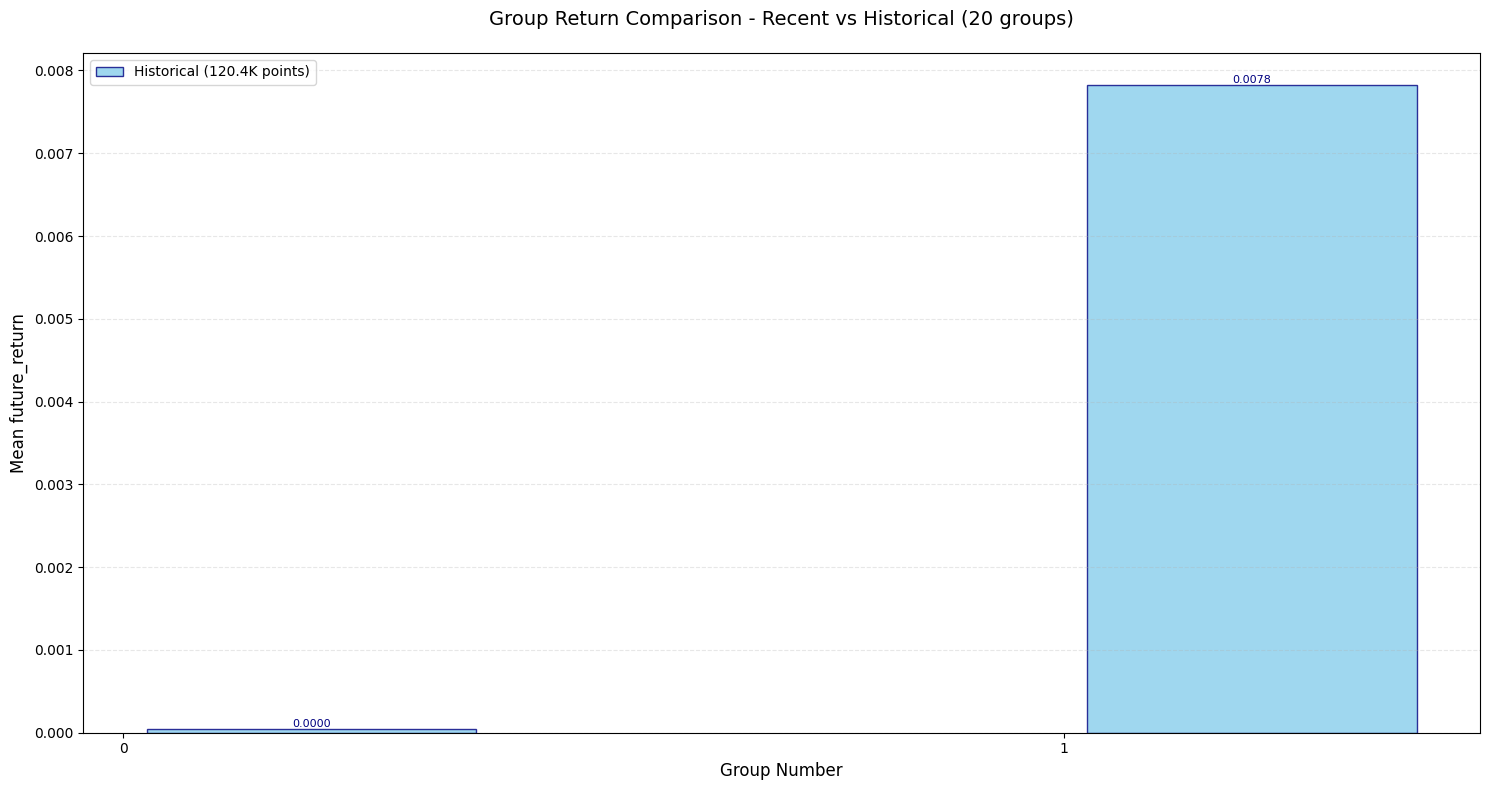

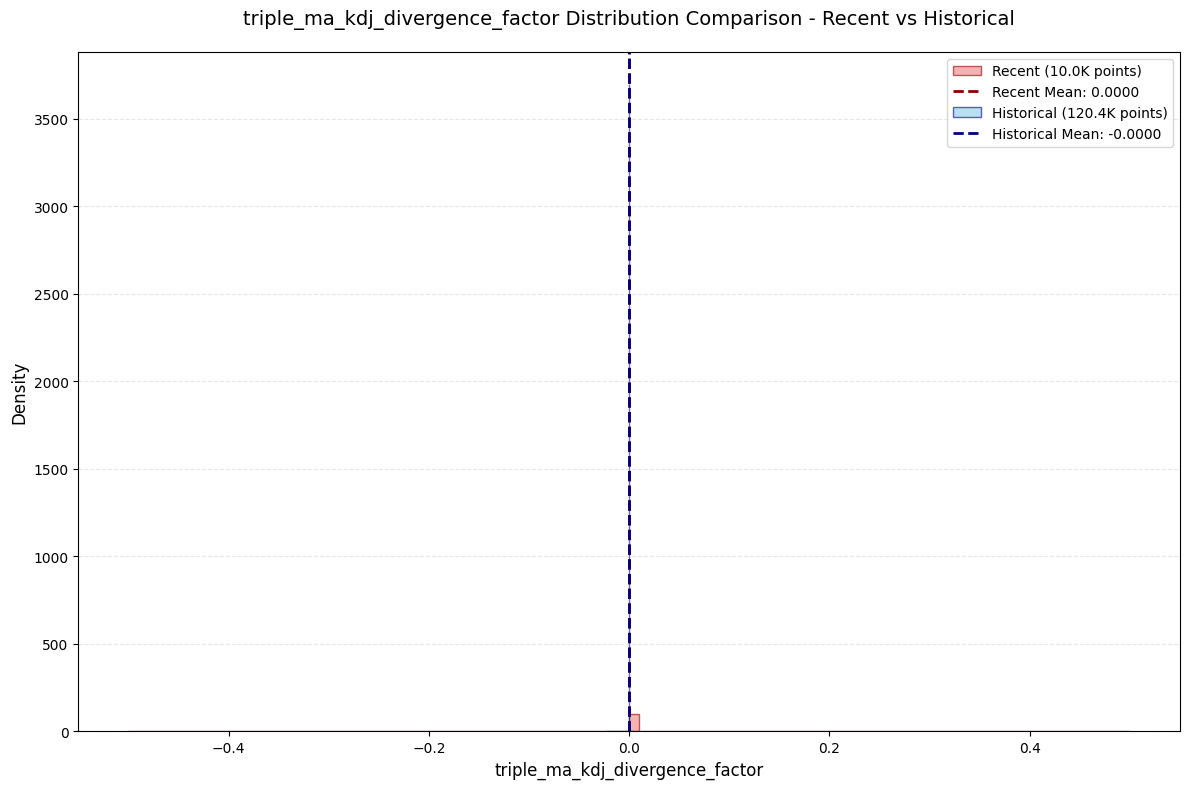

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [6]:
result=evaluator.run_full_evaluation(run_stationarity_test=True)